In [21]:
from functools import reduce
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [29]:
# main dataset
price = pd.read_csv('data\Raw_Price.csv')

# feature dataset
## income
income = pd.read_excel('data\Income.xls') # long feature
income_inequality = pd.read_excel('data\Income_Inequality_Ratio.xls') # long feature
ad_household_wage = pd.read_excel('data\Mean_Household_Wages_Adjusted_by_Cost.xls')

## education
BD = pd.read_excel('data\Bachelor_Degree_or_Higher.xls') # long feature
high_school = pd.read_excel('data\High_School_Graduate_or_Higher.xls') # long feature

## market (monthly)
inventory_new = pd.read_excel('data\Inventory_New_Listing_Percent.xls')
inventory_total = pd.read_excel('data\Inventory_Total_Listing_Percent.xls')
demand = pd.read_excel('data\Market_Demand_Score.xls')
nielsen_rank = pd.read_excel('data\Market_Nielsen_Household_Rank.xls')
supply = pd.read_excel('data\Market_Supply_Score.xls')

## population
migration = pd.read_excel(r'data\Net_Migration_Flow.xls')  # long feature
resident = pd.read_excel('data\Resident_Population.xls')  # long feature


# # Get all data file names in folder "data"
# import os
# filePath = 'data\..'
# for dirpath, dirnames, filenames in os.walk(filePath):
#     print(filenames)

# Dataset Generation

In [138]:
# merge features to the price dataset as "df"
all_long_features = reduce(lambda left, right: pd.merge(left, right, on=['RegionName','State']), long_features)
all_short_features = reduce(lambda left, right: pd.merge(left, right, on=['RegionName','State']), short_features)
df = pd.merge(price, all_long_features, on=['RegionName','State'])

print(price.count(), df.count())

KeyError: 'RegionName'

# Data Visualization

### Monthly average price trend

C:\Users\15519\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


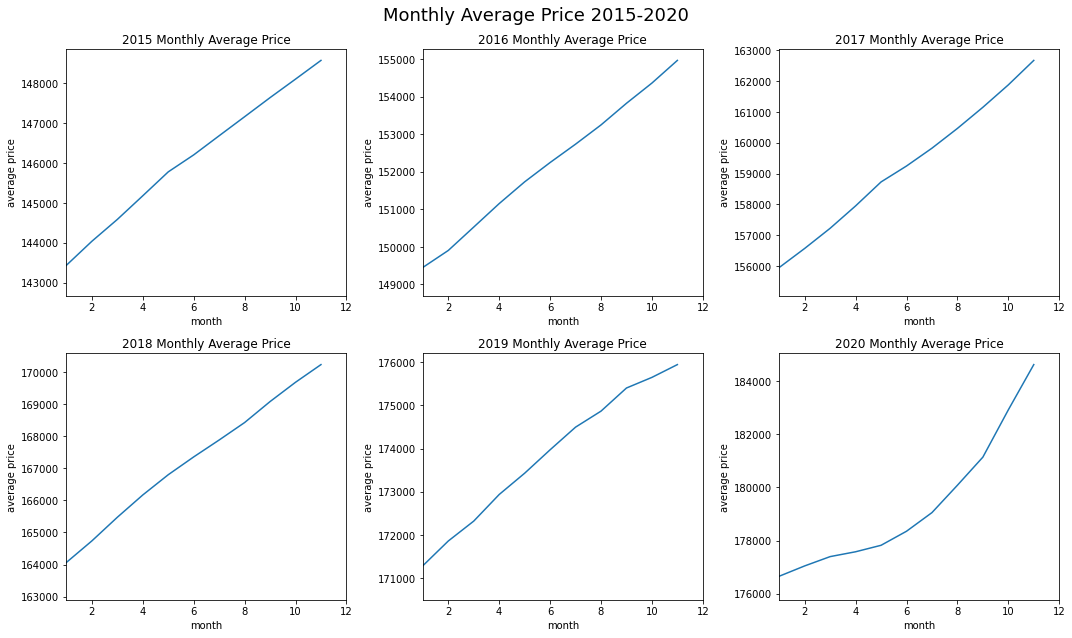

In [11]:
#draw 2015-2019 subplot
ave_price = pd.Series()
for j in [5,6,7,8,9]:
    ave_price['201%d'%j] = df.filter(regex='201%d-'%j)

fig = plt.figure(figsize=(15, 9))
for i in [5,6,7,8,9]:
    plt.subplot(2,3,i-4)
    mean = []
    p = ave_price['201%d'%i]
    for col in p.columns:
        mean.append(p[col].mean())
    plt.plot(mean)
    plt.xlim((1,12))
    plt.xlabel('month')
    plt.ylabel('average price')
    plt.title('201%d Monthly Average Price'%i)

# draw 2020 subplot
plt.subplot(2,3,6)
mean = []
p = df.filter(regex='2020-')
for col in p.columns:
    mean.append(p[col].mean())
plt.plot(mean)
plt.xlim((1,12))
plt.xlabel('month')
plt.ylabel('average price')
plt.title('2020 Monthly Average Price')

plt.suptitle('Monthly Average Price 2015-2020', fontsize=18)
plt.tight_layout()

# Preliminary models

### KMeans Classification

C:\Users\15519\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


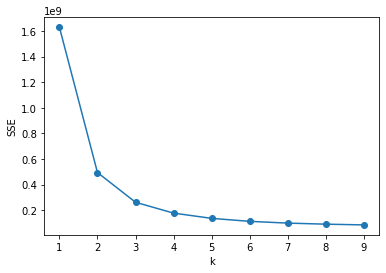

In [12]:
SSE = []  # sum of squared error
for k in range(1, 10):
    estimator = KMeans(init = 'k-means++', n_clusters = k)
    estimator.fit(all_short_features.iloc[:,2:].dropna())
    SSE.append(estimator.inertia_)
X = range(1, 10)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X, SSE, 'o-')
plt.show()

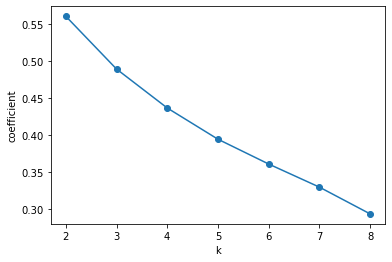

In [13]:
Scores = []  # silhouette coefficient
for k in range(2, 9):
    estimator = KMeans(n_clusters=k)  
    estimator.fit(all_short_features.iloc[:,2:].dropna())
    Scores.append(silhouette_score(all_short_features.iloc[:,2:].dropna(), estimator.labels_, metric='euclidean'))
X = range(2, 9)
plt.xlabel('k')
plt.ylabel('coefficient')
plt.plot(X, Scores, 'o-')
plt.show()